## 03. 앙상블 학습
- 개요
  - 여러개의 분류기(Classifier)를 생성하고 그 예측을 결합 -> 최종 예측 도출
  - 목표: 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것
  - 비정형데이터(이미지, 영상, 음성)의 분류 -> 딥러닝이 뛰어남
  - 대부분의 정형데이터 분류-> 앙상블이 뛰어난 성능

- 학습유형
  - 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정
    - 보팅(Voting): 서로 다른 알고리즘 가진 분류기 결합
    - 배깅(Bagging): 각각의 분류기가 모두 같은 유형의 알고리즘 기반, 데이터 샘플링을 다르게 학습 수행  
      부트 스트래핑 분할 방식으로 샘플링된 데이터에 대해 학습 -> 개별 예측  -> 보팅 -> 최종 예측 결과 선정  
      ex) 랜덤포레스트 알고리즘

      
  - 부스팅(Boosting): 여러개의 분류기가 순차적으로 학습 수행하되, 다음 분류기에는 가중치(weight) 부여 하면서 학습과 예측 진행
  - 스태킹: 여러가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델로 재학습시켜 결과 예측 

#### 보팅 유형
- 하드 보팅: 다수결 원칙과 비슷 -> 다수의 분류기가 결정한 예측값을 최종 보팅 값으로 선정
- 소프트 보팅: 분류기들의 레이블 값 결정 확률을 모두 더하여 평균 -> 확률이 가장 높은 레이블 값을 최종 보팅 값으로 선정  
  => 소프트 보팅이 보팅 방법으로 

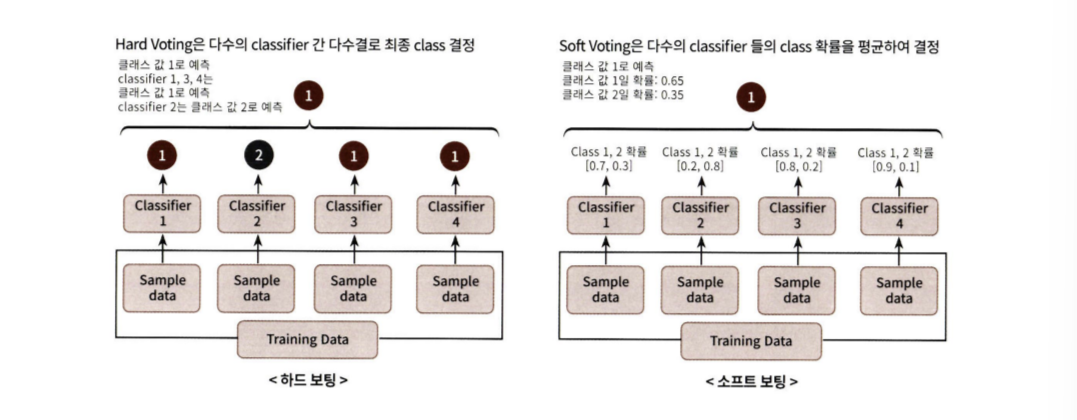

#### 보팅 분류기(Voting Classifier) : 보팅 방식의 앙상블 구현한 클래스

- 위스콘신 유방암 데이터 세트 예측 및 분석
: load_breast_cancer() 함수 통해 데이터 세트 생성

In [2]:
import pandas as pd 

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


로지스틱 회귀와 KNN기반 보팅 분류기 생성: VotingClassifier클래스  
-> VotingClassifier(estimators=[( , )], voting='유형')

In [14]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression(max_iter=500)
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators = [('LR',lr_clf),('KNN',knn_clf)], voting = 'soft')  
X_train, X_test, y_train, y_test = train_test_split(cancer.data , cancer.target, 
                                                    test_size = 0.2,random_state = 156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

#개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train,y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))


Voting 분류기 정확도: 0.9561
LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9386


    * 보팅 분류기 정확도가 조금 더 높음   
    (보팅으로 여러개의 기반 분류기를 결합해도 무조건 기반 분류기보다 예측 성능이 향상되지는 x)
    * 앙상블은 전반적으로 다른 단일 ML 알고리즘 보다 뛰어난 예측 성능을 가지는 경우가 많음
    * ML 모델의 성능은 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는 가가 중요한 평가요소
    -> 편향-분산 트레이드오프 : ML 모델이 극복해야 할 중요 과제
    * 보팅& 스태킹: 서로 다른 알고리즘 기반
    * 배깅& 부스팅: 결정 트리 알고리즘 기반-> 직관적 분류 기준 -> 예측 성능 떨어질 수 O(단점)
=> 앙상블 학습: 결정트리 알고리즘의 장점은 그대로 취하고 단점 보완 -> 편향 -분산 트레이드오프 효과 극대화

## 04. 랜덤 포레스트: 배깅의 대표 알고리즘
#### 랜덤 포레스트의 개요 및 실습
- 앙상블 알고리즘 중 비교적 빠른 수행속도
- 다양한 영역에서 높은 예측 성능
- 기반 알고리즘: 결정트리 -> 쉽고 직관적인 장점
- 여러개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링  
  -> 개별적으로 학습 수행 -> 최종적으로 모든 분류기가 보팅을 통해 예측 결정
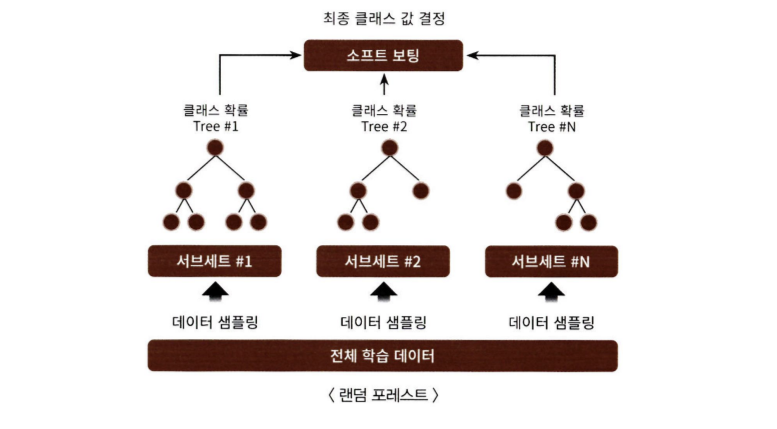  

- 개별 트리가 학습하는 데이터 세트: 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트
- 여러 개의 데이터 세트를 중첩되게 분리 -> 부트 스트래핑 분할 방식
  - 부트스트랩: 통계학에서 여러 개의 작은 데이터 세트를 임의로 만들어 개별 평균의 분포도를 측정하는 등의 목적을 위한 샘플링 방식
- 서브세트(Subset) 데이터  
  : 부트스트래핑으로 임의로 생성됨 -> 전체 데이터 건수와 데이터 건수 동일 but 개별 데이터가 중첩됨

  
  [ 원본 데이터 건수 : 10개인 학습 데이터 세트 - 랜덤포레스트 3개의 결정 트리 기반 학습(n_estimators=3) ]  
  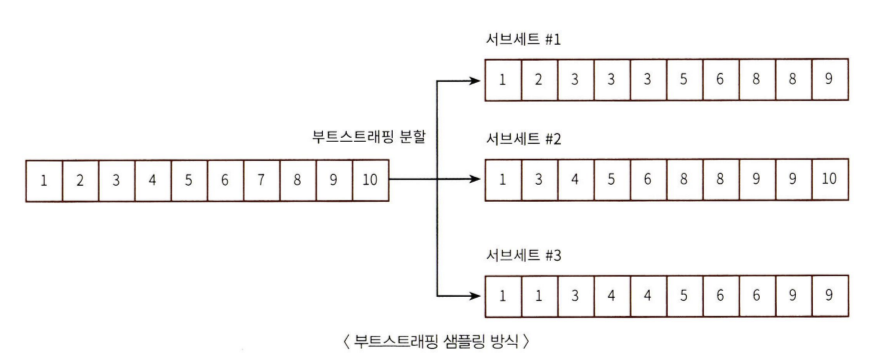

- RandomFForestClassifier 클래스를 통한 사용자 행동 인식 데이터 세트 예측  
: get_human_dataset() 이용하여 학습 / 테스트용 데이터프레임 가져옴

In [3]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                               if x[1]>0 else x[0], axis =1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis =1)
    return new_feature_name_df

In [4]:
def get_human_dataset():

    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', 
                                  header=None, names=['column_index', 'column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # 학습 피처 데이터 세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 변환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

C:\Users\leehj\AppData\Local\Temp\ipykernel_179052\31044781.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1]>0 else x[0], axis =1)
C:\Users\leehj\AppData\Local\Temp\ipykernel_179052\31044781.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


#### 랜덤 포레스트 하이퍼 파라미터 및 튜닝
- n_estimators: 결정 트리의 개수 지정 (default=10), 늘릴수록 학습 수행 시간 오래걸림 
- max_features: 결정 트리에 사용된 max_features와 동일 but default !='None', default = 'auto' = 'sqrt'
  -> 트리 분할하는 피처 참조할 때, 전체 피처가 아닌 sqrt(전체 피처 개수)만큼 참조
- max_depth / min_samples_leaf : 과적합 개선위해 사용되는 파라미터 -> 결정트리와 동일하게 적용됨

GridSearchCV를 이용해 랜덤 포레스트 하이퍼 파라미터 튜닝하기  
    * CPU 병렬 처리도 효과적으로 수행 -> 빠른 학습 가능 -> 랜덤포레스트로 기반 모델 먼저 구축하는 경우 많음  
    * RandomForestClassifier, GridSearchCV 생성시 n_jobs = -1 파라미터 추가 -> 모든 CPU 코어 이용하여 학습 가능

In [24]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf':[8, 12, 18],
    'min_samples_split':[8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


n_estimators = 300으로 증가+ 최적 하이퍼 파라미터로 다시 RandomForestClassifier 학습  
->별도의 테스트 데이터 세트에서 예측 성능 측정

In [28]:
rf_clf1 = RandomForestClassifier(n_estimators = 300, max_depth=10, min_samples_leaf=8, 
                                 min_samples_split=8, random_state = 0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9165


피처 중요도를 막대그래프로 시각화

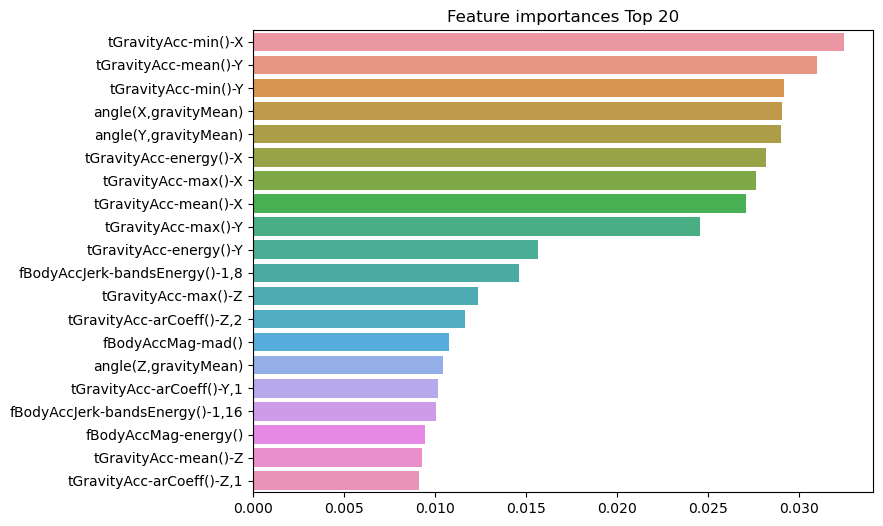

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values=rf_clf1.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 5. GBM(Gradient Boosting Machine)
#### GBM의 개요 및 실습 
- 부스팅 알고리즘: 여러 개의 약한 학습기를 순차적으로 학습-예측 -> 잘못 예측한 데이터에 가중치 부여  
  -> 오류 개선해 나가면서 학습하는 방식  ex) Ada Boost, 그래디언트 부스트
  - Ada Boost: 오류 데이터에 가중치 부여하면서 부스팅 수행하는 대표적 알고리즘
    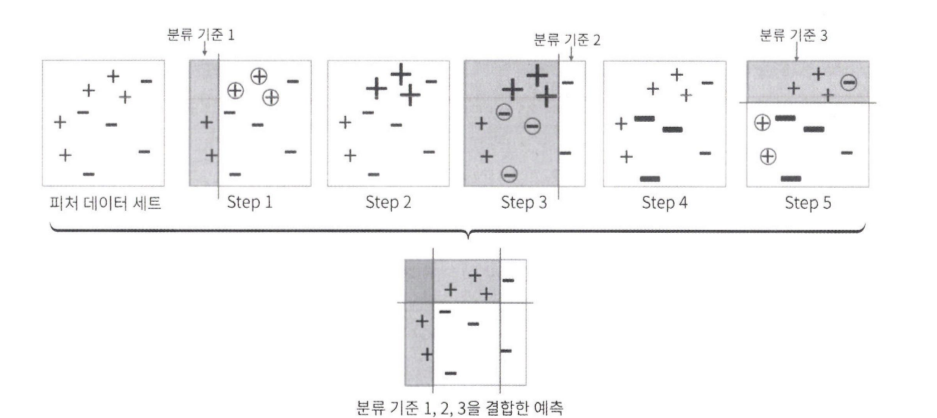
    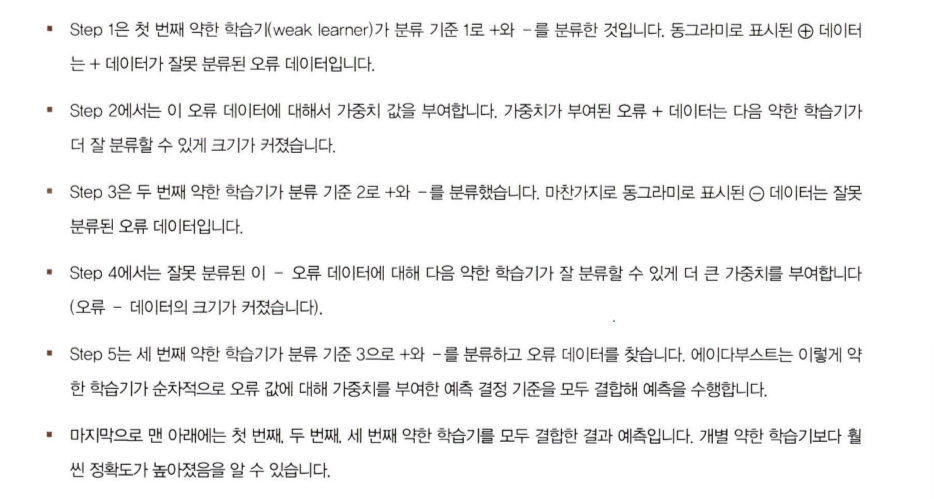
    개별 약한 학습기는 각각 가중치 부여해 결합
    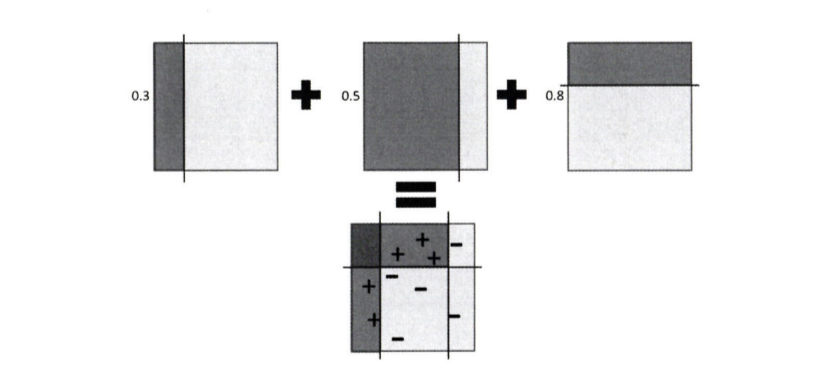
  - GBM: 에이다 부스트와 유사하나, 가중치 업데이트를 경사 하강법을 이용하는 것이 큰 차이
    - 오류값 = 실제 값 - 예측값
    - 실제 결괏값 y
    - 피처 $x_1, x_2, ... , x_n$
    - 피처에 기반한 예측 함수 : F(x)
    - 오류식 h(x) = y - F(x) : 최소화하는 방향성을 가지고 반복적으로 가중치 값 업데이트 => 경사하강법
      - 경사하강법: 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법
    - 회귀, 분류 모두 가능 (CART 기반의 다른 알고리즘도 동일)
    - GradientBoostingClassifier 클래스 제공

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 1440.4 초


#### GBM 하이퍼 파라미터 및 튜닝
- n_estimators, max_depth, max_features같은 트리 기반 자체의 파라미터 : 결정트리, RF와 동일
- loss: 경사 하강법에서 사용할 비용함수 지정 -> default = 'deviance'
- learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습툴  
  -> Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수: 0~1 사이 값 지정 (default=0.1)
  - 너무 작은 값
    - 최소 오류 값을 찾아 예측 성능이 높아질 가능성 O but 순차적반복 필요 -> 수행시간 오래걸림
    - 반복 완료 돼도 최소 오류값을 찾지 못할 수 O
  - 큰 값: 최소 오류값을 찾지 못하고 그냥 지나쳐 예측 성능이 떨어질 가능성이 높지만 빠른 수행 가능
  => learning_rate는 n_estimator와 상호 보완적으로 조합해 사용
- n_estimators: weak learner의 개수, 일정 수준까지는 개수가 많을수록 예측성능이 좋아질 수 O (default = 100)
- subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율 (default = 1: 전체 학습데이터를 기반으로 학습)

[ 각광받는 그래디언트 부스팅 기반 ML 패키지 ]  
      : XGBoost와 LightGBM

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate': [0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv_best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [ ]:
# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행.
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

## 06. XGBoost(eXtra Gradient Boost)
#### XGBoost 개요  
- 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘
- GBM 기반 + GBM 단점 및 문제점 해결 : 느린 수행시간과 과적합 규제 부재 문제
- 병렬 CPU 환경에서병렬 학습 가능
- 장점
  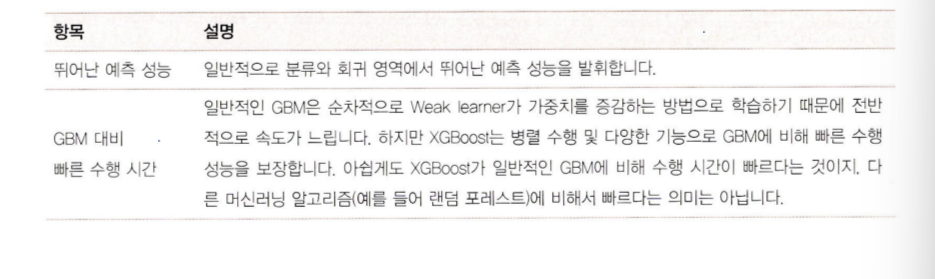
  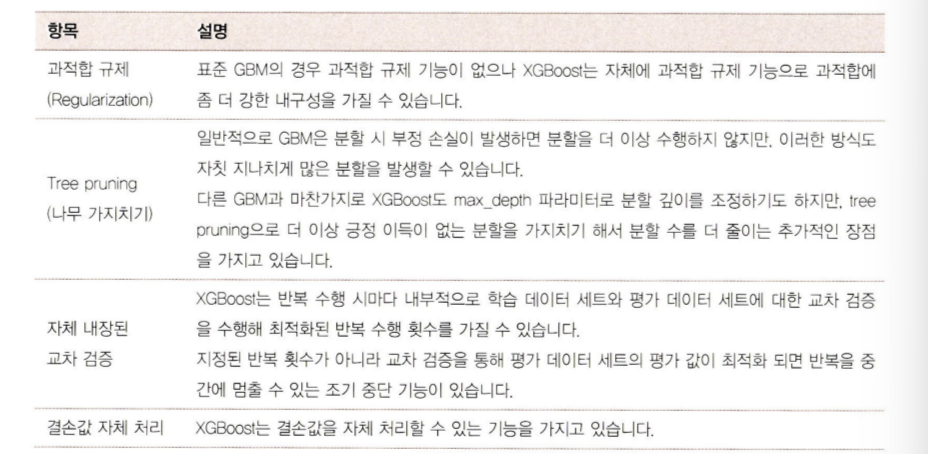
  

#### XGBoost 설치하기

In [1]:
import xgboost as xgb
from xgboost import XGBClassifier

#### 파이썬 래퍼 XGBoost 하이퍼 파라미터
- 일반 파라미터: 일반적으로 실행 시 스레드의 개수나silent 모드 등의 선택을 위한 파라미터 -> 거의 바꾸지 X
  - booster
  - silent
  - nthread
- 부스터 파라미터: 트리 최적화, 부스팅, regularization 등과 관련 파라미터 지칭 -> 대부분의 하이퍼 파라미터
  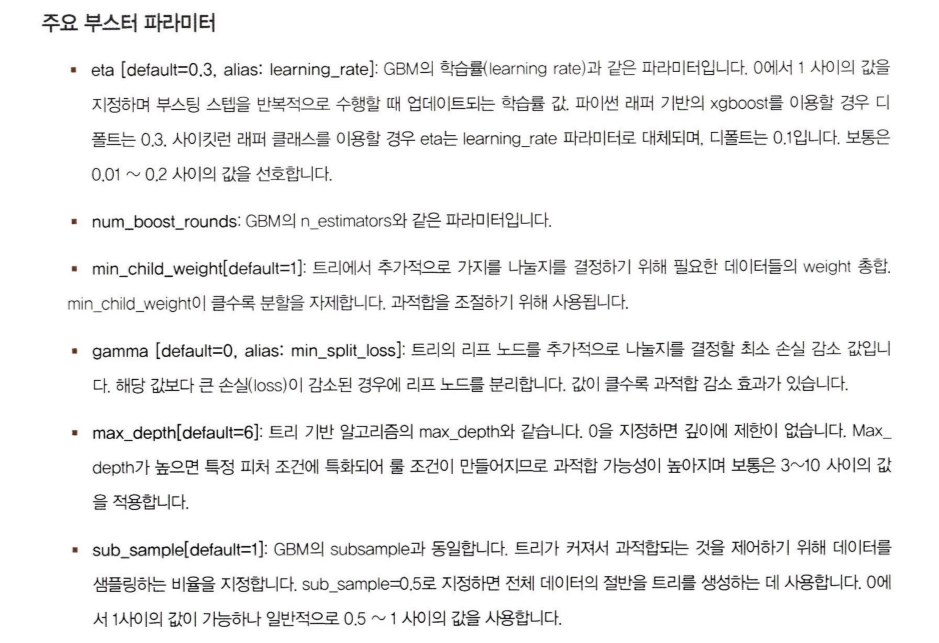
  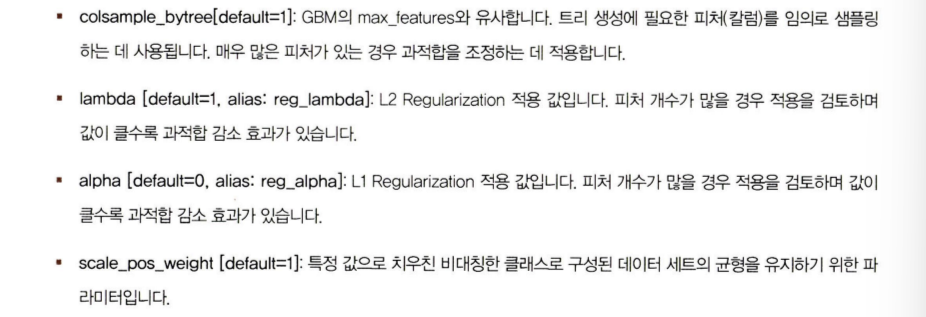
- 학습 태스크 파라미터: 학습 수행시 객체 함수, 평가를 위한 지표 설정
 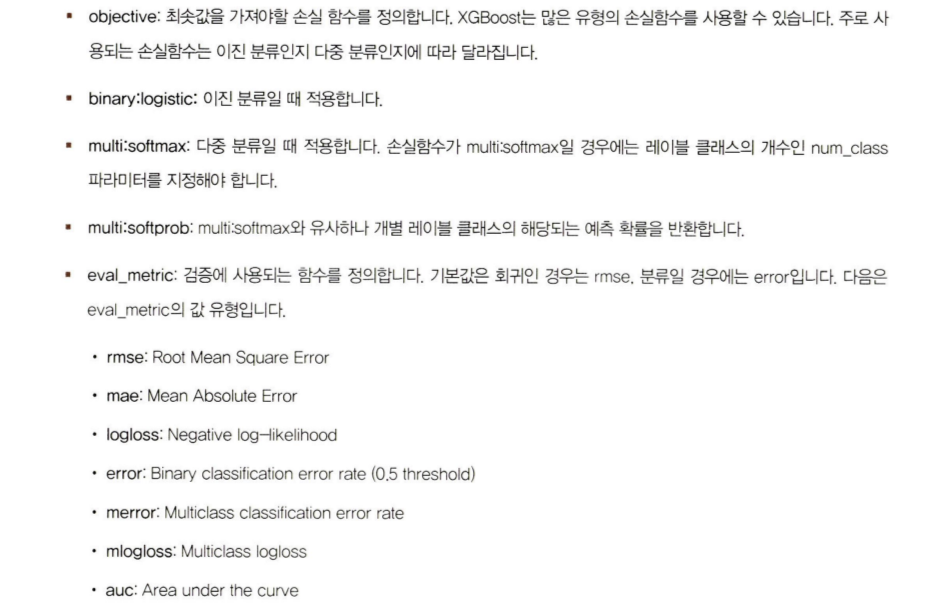

In [2]:
import xgboost
print(xgboost.__version__)

1.7.3


#### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

In [4]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [5]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [6]:
# 전체 데이터 중 89%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, 
                                                    test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


- 파이썬 래퍼 XGBoost와 사이킷런의 차이
    - 학습용 데이터와 테스트용 데이터 세트를 위해 별도의 객체인 DMatrix생성
        -DMatrix: 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트
- XGBoost 모듈: xgboost 를 이용해 학습 수행 전 XGBoost 하이퍼 파라미터 설정 -> 딕셔너리 형태로 입력  
  현재 예제에서의 하이퍼 파라미터 설정 상황
    - max_depth: 트리 최대 깊이 
    - learning_rate
    - 예제 테이터 : 이진분류(0/1) -> 목적함수: 이진 로지스틱
    - 오류 함수의 평가 성능 지표 : logloss
    - num_rounds: 부스팅 반복 횟수
- XGBoost의 조기 중단 기능: 수행 속도 개선 위함
  - xgboost의 train() 함수: early_stopping_rounds 파라미터로 설정
    - eval_set: 성능 평가 수행할 평가용 데이터 세트 설정 
    - eval_metric: 평가 세트에 적용할 성능 평가 방법(분류-error, logloss 주로 적용)

In [7]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [8]:
params = {'max_depth':3, 
          'eta':0.1, 
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [9]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기합니다.
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early_stopping 파라미터를 train()함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, 
                      early_stopping_rounds=100, evals=wlist)

[09:49:01] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "early_stoppings" } are not used.

[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35415	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.17792	eval-logloss:0.22005
[14]	train-logloss:0.16522	eval-logloss:0.20857
[15]	train-logloss:0.15362	eval-logloss:0.19999
[16]	train-logloss:0.14333	eval-logloss:0.19012
[17]	train-logloss:0.13398	eval-logloss:0.181

In [13]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
def get_clf_eval(y_test, pred=None, pred_proba=None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # roc_auc 추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, \
    F1 : {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [23]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율 : 0.9870,     F1 : 0.9806, AUC:0.9951


- xgboost의 plot_importance(): 피처의 중요도를 막대그래프 형식으로 나타냄
    - 유의점: 피처명 구분을 위해 피처 순서별로 f+순서 붙여서 피처들로 나열

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

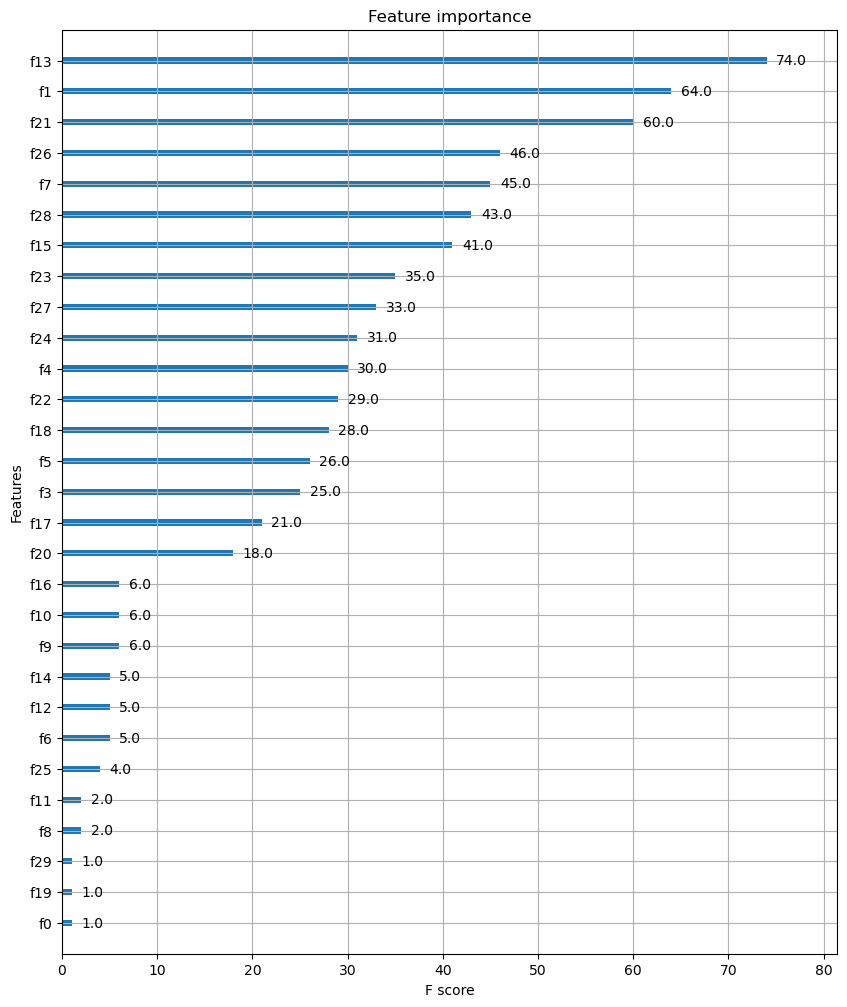

In [24]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax = ax)

GridSearchCV와 유사 : 교차 검증 수행 후 최적 파라미터 구할 수 있는 방법 제시 -> cv() API와 파라미터
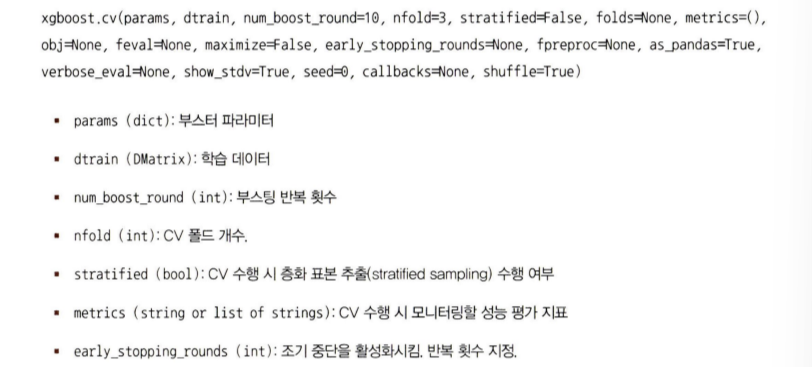  
-> 반환값: DataFrame  

In [25]:
xgboost.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds = None, metrics =(),
           obj=None, feval=None, maximize=False, early_stopping_rounds=None, fpreproc=None, as_pandas=True, 
           verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)

[09:53:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "early_stoppings" } are not used.

[09:53:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "early_stoppings" } are not used.

[09:53:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "early_stoppings" } are not used.



,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.610037,0.000064,0.617448,0.004961
1,0.541817,0.000203,0.555140,0.008989
2,0.483716,0.000955,0.503529,0.012238
3,0.434676,0.001311,0.459869,0.015795
4,0.392310,0.001686,0.423058,0.016788
5,0.355129,0.001391,0.391187,0.019785
6,0.322530,0.001908,0.361119,0.019378
7,0.294159,0.001618,0.337139,0.021086
8,0.269083,0.002068,0.314903,0.019971
9,0.246208,0.001940,0.295012,0.019237


#### 사이킷런 래퍼 XGBoost의 개요 및 적용
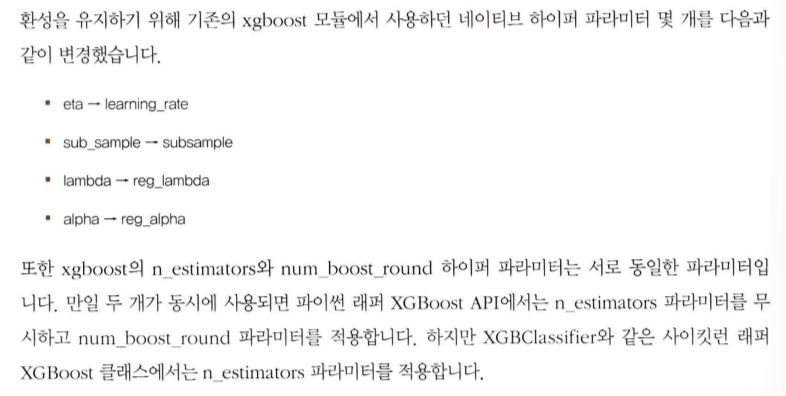  
- XGBClassifier 클래스의 fit(), predict(), predict_proba() 이용하여 학습 및 예측 수행
- 조기중단 관련 파라미터
  - early_stopping_rounds: 반복 횟수 정의
  - eval_metric: 조기 중단을 위한 평가지표
  - eval__set : 성능 평가를 수행할 데이터 세트 -> 학습 데이터가 아닌 별도의 데이터 세트
  - 조기 중단 값을 너무 급격히 줄이면 예측 성능이 저하될 우려가 크기 때문에 유의 필요

In [26]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train,y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [27]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율 : 0.9870,     F1 : 0.9806, AUC:0.9951


In [28]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', 
                eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

In [29]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도 : 0.9649, 정밀도 : 0.9620, 재현율 : 0.9870,     F1 : 0.9744, AUC:0.9954


In [30]:
# early_stopping_rounds를 10으로 설정하고 재학습.
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10,
                eval_metric='logloss', eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

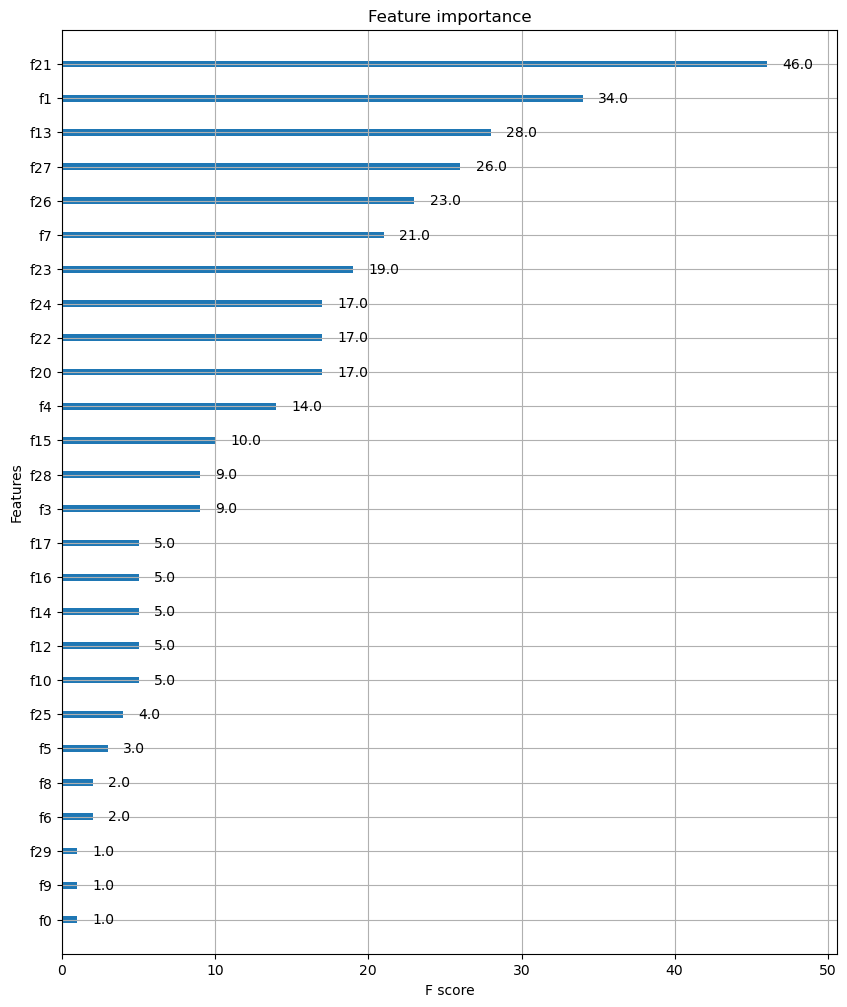

In [31]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(figsize=(10,12))
# 사이킷런 Wrapper 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)